In [ ]:
import icarogw, numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def plot_model(wrapper, redshift_evolution = False):

    N = 10000
    N_z = 10
    x = np.linspace(1, 100, N)
    zx = np.linspace(0, 1, N)
    zy = np.linspace(0, 1, N_z)
    _, z_grid = np.meshgrid(zx, zy)

    colors  = sns.color_palette('RdBu_r', len(z_grid))
    _, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5), sharex=True)

    for zi, z_array in enumerate(z_grid):
        if not redshift_evolution: pdf = wrapper.pdf(x)
        else:                      pdf = wrapper.pdf(x, z_array)
        z = z_array[0]
        ax1.plot(x, pdf + z, color=colors[zi])
        ax2.plot(x, pdf,     color=colors[zi])

    x_bounds = (1, 70)
    y_bounds = (1e-5, 1)
    x_label = "mass [M_sun]"
    ax2.set_xlim(x_bounds)
    ax2.set_ylim(y_bounds)
    ax2.set_yscale('log')
    ax1.set_xlabel(x_label)
    ax2.set_xlabel(x_label)
    ax1.set_ylabel("redshift")
    ax2.set_ylabel("PDF")
    plt.tight_layout()
    plt.show()
    plt.close()

# Mass models

### Powerlaw Powerlaw

['alpha_a', 'mmin_a', 'mmax_a', 'alpha_b', 'mmin_b', 'mmax_b', 'mix', 'delta_m_a', 'delta_m_b']


/Users/vgennari/anaconda3/envs/icarogw_env/lib/python3.10/site-packages/icarogw/priors.py:147: RuntimeWarning: overflow encountered in exp
  effe_prime[select_window] = xp.exp(xp.nan_to_num((delta_m/mprime[select_window])+(delta_m/(mprime[select_window]-delta_m))))
/Users/vgennari/anaconda3/envs/icarogw_env/lib/python3.10/site-packages/icarogw/priors.py:578: RuntimeWarning: divide by zero encountered in log
  prob_ret =self.origin_prob.log_pdf(x)+xp.log(window)-xp.log(self.norm)


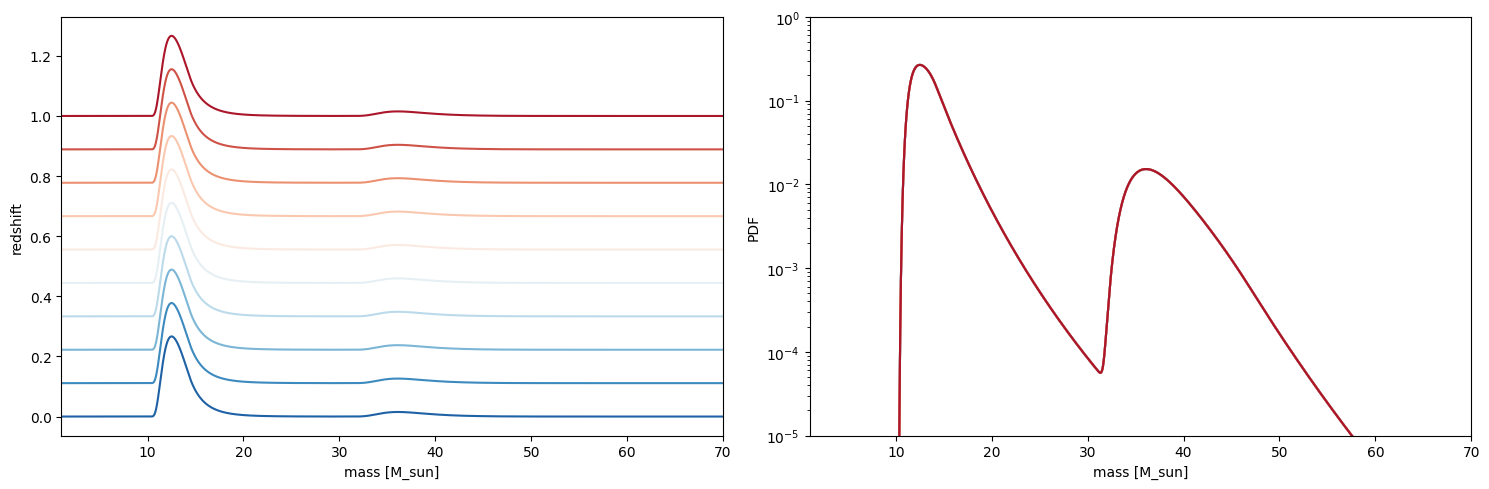

In [3]:
mw = icarogw.wrappers.PowerLaw_PowerLaw()
print(mw.population_parameters)

mw.update(
    alpha_a   = 10.,
    mmin_a    = 10.,
    mmax_a    = 100.,
    delta_m_a = 5.,
    
    alpha_b   = 20.,
    mmin_b    = 30.,
    mmax_b    = 60.,
    delta_m_b = 20.,

    mix       = 0.9)

plot_model(mw)

### Powerlaw Powerlaw Powerlaw

['alpha_a', 'mmin_a', 'mmax_a', 'alpha_b', 'mmin_b', 'mmax_b', 'alpha_c', 'mmin_c', 'mmax_c', 'mix_alpha', 'mix_beta', 'delta_m_a', 'delta_m_b', 'delta_m_c']


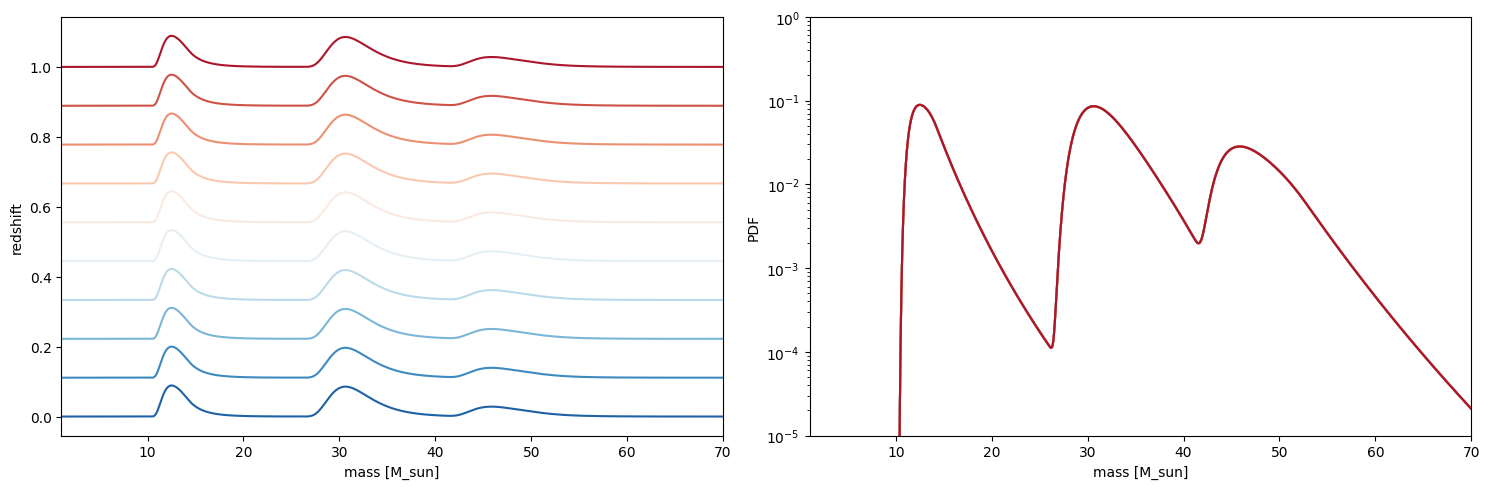

In [4]:
mw = icarogw.wrappers.PowerLaw_PowerLaw_PowerLaw()
print(mw.population_parameters)

mw.update(
    alpha_a   = 10.,
    mmin_a    = 10.,
    mmax_a    = 100.,
    delta_m_a = 5.,

    alpha_b   = 20.,
    mmin_b    = 25.,
    mmax_b    = 60.,
    delta_m_b = 20.,

    alpha_c   = 20.,
    mmin_c    = 40.,
    mmax_c    = 100.,
    delta_m_c = 15.,

    mix_alpha = 0.3,
    mix_beta  = 0.5)

plot_model(mw)

### Powerlaw Powerlaw Gaussian

['alpha_a', 'mmin_a', 'mmax_a', 'alpha_b', 'mmin_b', 'mmax_b', 'mu_g', 'sigma_g', 'mix_alpha', 'mix_beta', 'delta_m_a', 'delta_m_b']


/Users/vgennari/anaconda3/envs/icarogw_env/lib/python3.10/site-packages/icarogw/priors.py:1721: RuntimeWarning: divide by zero encountered in log
  gaussian = xp.log( sx.stats.truncnorm.pdf(m, a, b, loc = self.mu, scale = self.sigma) )


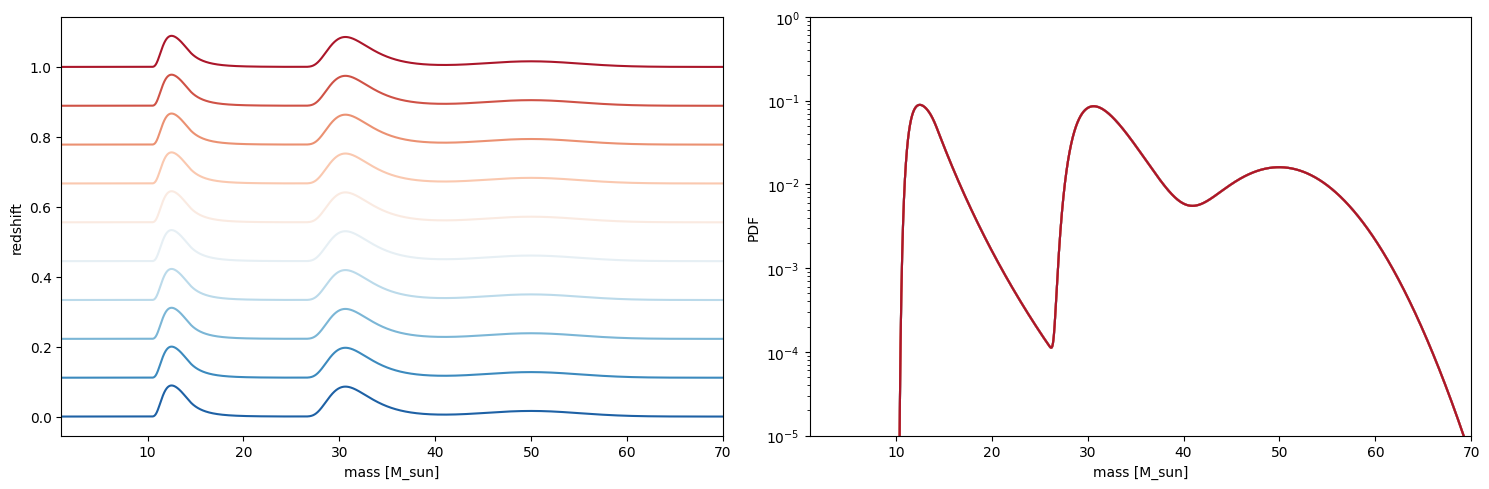

In [5]:
mw = icarogw.wrappers.PowerLaw_PowerLaw_Gaussian()
print(mw.population_parameters)

mw.update(
    alpha_a   = 10.,
    mmin_a    = 10.,
    mmax_a    = 100.,
    delta_m_a = 5.,

    alpha_b   = 20.,
    mmin_b    = 25.,
    mmax_b    = 60.,
    delta_m_b = 20.,

    mu_g      = 50.,
    sigma_g   = 5.,

    mix_alpha = 0.3,
    mix_beta  = 0.5)

plot_model(mw)

### Powerlaw Gaussian(z)

['alpha', 'mmin', 'mmax', 'mu_z0', 'mu_z1', 'sigma_z0', 'sigma_z1', 'mix_z0', 'mix_z1', 'delta_m']


/Users/vgennari/anaconda3/envs/icarogw_env/lib/python3.10/site-packages/icarogw/priors.py:1744: RuntimeWarning: divide by zero encountered in log
  gaussian = xp.log( sx.stats.truncnorm.pdf(m, a, b, loc = self.muz, scale = self.sigmaz) )


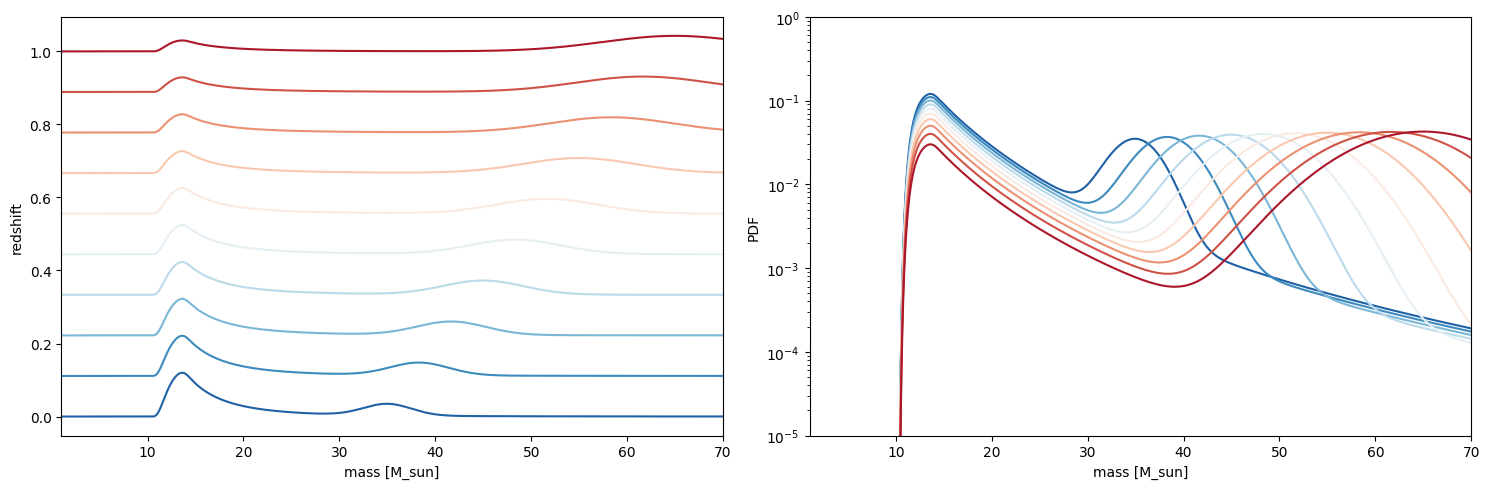

In [6]:
mw = icarogw.wrappers.PowerLaw_GaussianRedshiftLinear(flag_powerlaw_smoothing = 1, redshift_transition = 'linear')
print(mw.population_parameters)

mw.update(
    alpha    = 4.,
    mmin     = 10.,
    mmax     = 150.,
    delta_m  = 5.,

    mu_z0    = 35.,
    mu_z1    = 30.,
    sigma_z0 = 2.5,
    sigma_z1 = 5.,

    mix_z0   = 0.8,
    mix_z1   = 0.2)

plot_model(mw, redshift_evolution = True)

### Powerlaw Gaussian(z) Gaussian(z)

['alpha', 'mmin', 'mmax', 'mu_a_z0', 'mu_a_z1', 'sigma_a_z0', 'sigma_a_z1', 'mu_b_z0', 'mu_b_z1', 'sigma_b_z0', 'sigma_b_z1', 'mix_alpha_z0', 'mix_beta_z0', 'mix_alpha_z1', 'mix_beta_z1', 'delta_m']


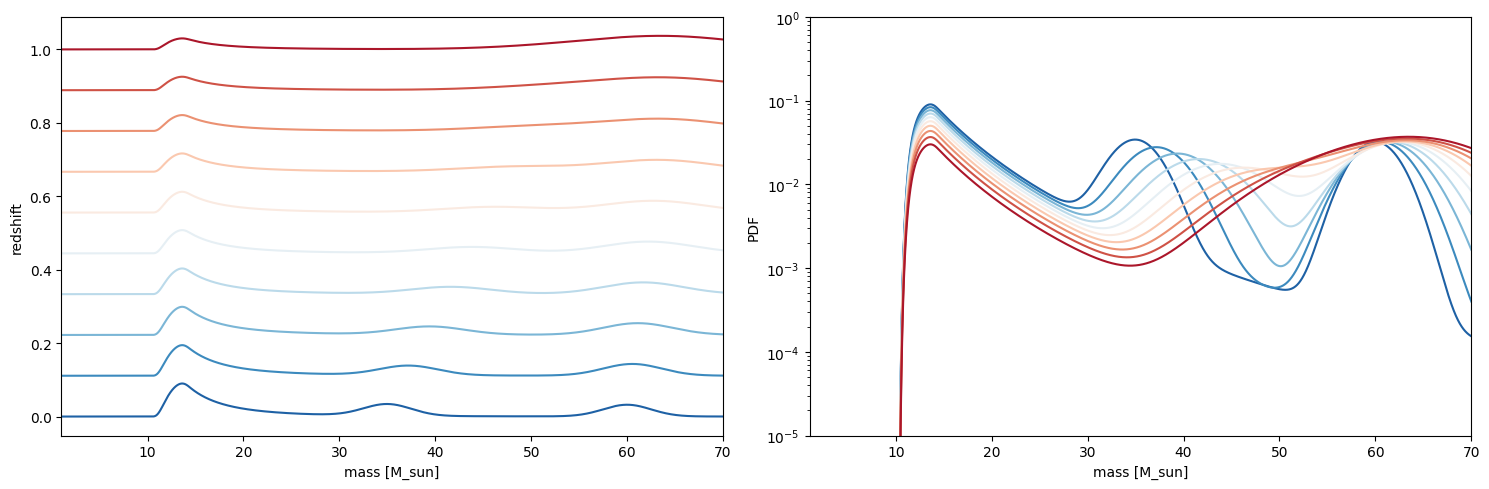

In [7]:
mw = icarogw.wrappers.PowerLaw_GaussianRedshiftLinear_GaussianRedshiftLinear(flag_powerlaw_smoothing = 1, redshift_transition = 'linear')
print(mw.population_parameters)

mw.update(
    alpha        = 4.,
    mmin         = 10.,
    mmax         = 150.,
    delta_m      = 5.,

    mu_a_z0      = 35.,
    mu_a_z1      = 20.,
    sigma_a_z0   = 2.5,
    sigma_a_z1   = 5.,

    mu_b_z0      = 60.,
    mu_b_z1      = 5.,
    sigma_b_z0   = 2.5,
    sigma_b_z1   = 5.,

    mix_alpha_z0 = 0.6,
    mix_alpha_z1 = 0.2,
    mix_beta_z0  = 0.2,
    mix_beta_z1  = 0.2)

plot_model(mw, redshift_evolution = True)

### Powerlaw(z) Gaussian(z)

['alpha_z0', 'alpha_z1', 'mmin_z0', 'mmin_z1', 'mmax_z0', 'mmax_z1', 'mu_z0', 'mu_z1', 'sigma_z0', 'sigma_z1', 'mix_z0', 'mix_z1', 'delta_m']


/Users/vgennari/anaconda3/envs/icarogw_env/lib/python3.10/site-packages/icarogw/priors.py:660: RuntimeWarning: divide by zero encountered in log
  prob_ret = self.origin_prob.log_pdf(x)+xp.log(window)-xp.log(self.norm)


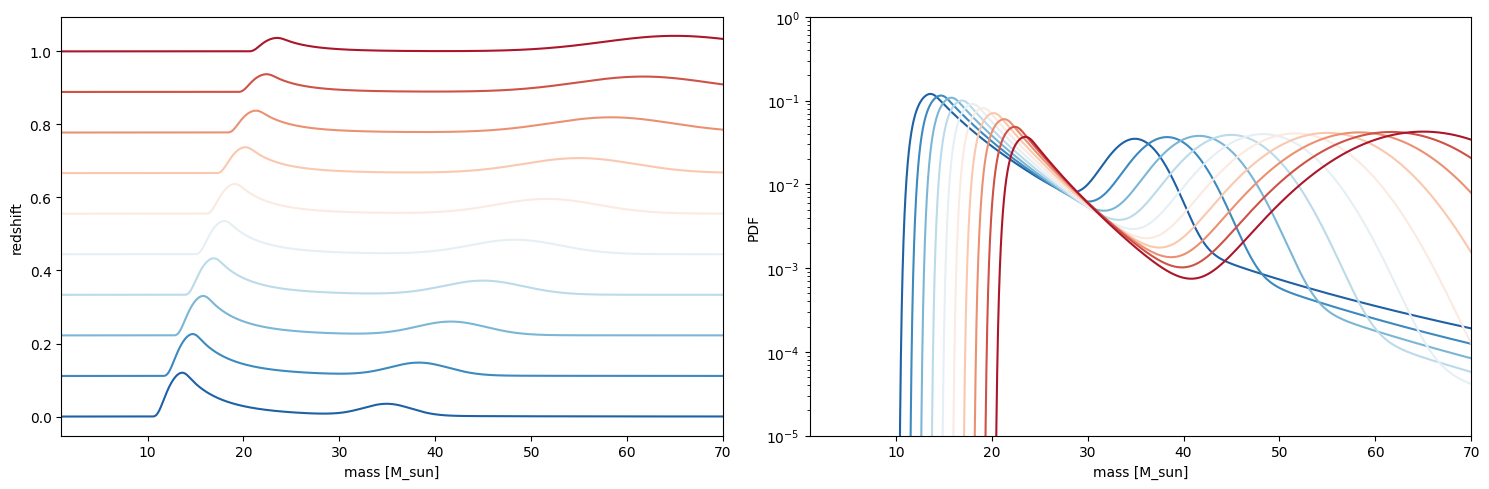

In [8]:
mw = icarogw.wrappers.PowerLawRedshiftLinear_GaussianRedshiftLinear(flag_powerlaw_smoothing = 1, redshift_transition = 'linear')
print(mw.population_parameters)

mw.update(
    alpha_z0 = 4.,
    mmin_z0  = 10.,
    mmax_z0  = 150.,
    alpha_z1 = 4.,
    mmin_z1  = 10.,
    mmax_z1  = 150.,
    delta_m  = 5.,

    mu_z0    = 35.,
    mu_z1    = 30.,
    sigma_z0 = 2.5,
    sigma_z1 = 5.,

    mix_z0   = 0.8,
    mix_z1   = 0.2)

plot_model(mw, redshift_evolution = True)

### Powerlaw(z) Powerlaw(z) Powerlaw(z)

['alpha_a_z0', 'alpha_a_z1', 'mmin_a_z0', 'mmin_a_z1', 'mmax_a_z0', 'mmax_a_z1', 'alpha_b_z0', 'alpha_b_z1', 'mmin_b_z0', 'mmin_b_z1', 'mmax_b_z0', 'mmax_b_z1', 'alpha_c_z0', 'alpha_c_z1', 'mmin_c_z0', 'mmin_c_z1', 'mmax_c_z0', 'mmax_c_z1', 'mix_alpha_z0', 'mix_beta_z0', 'mix_alpha_z1', 'mix_beta_z1', 'delta_m_a', 'delta_m_b', 'delta_m_c']


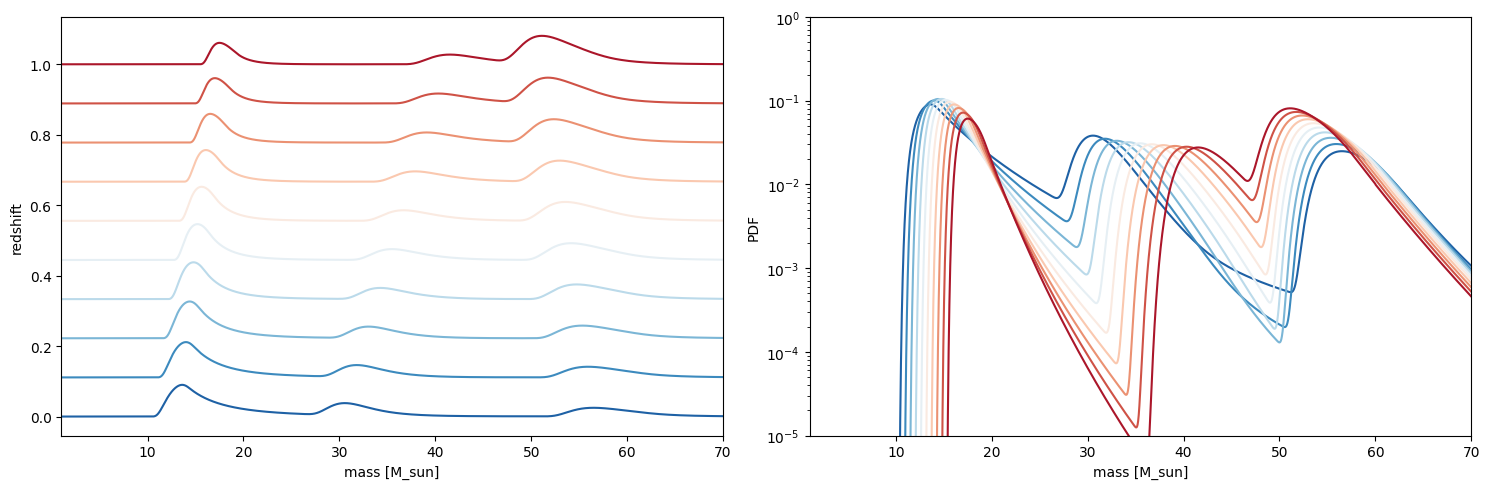

In [9]:
mw = icarogw.wrappers.PowerLawRedshiftLinear_PowerLawRedshiftLinear_PowerLawRedshiftLinear(flag_powerlaw_smoothing = 1, redshift_transition = 'linear')
print(mw.population_parameters)

mw.update(
    alpha_a_z0   = 4.,
    mmin_a_z0    = 10.,
    mmax_a_z0    = 150.,
    alpha_a_z1   = 10.,
    mmin_a_z1    = 5.,
    mmax_a_z1    = 0.,
    delta_m_a    = 5.,

    alpha_b_z0   = 20.,
    mmin_b_z0    = 25.,
    mmax_b_z0    = 60.,
    alpha_b_z1   = 0.,
    mmin_b_z1    = 10.,
    mmax_b_z1    = 0.,
    delta_m_b    = 20.,

    alpha_c_z0   = 20.,
    mmin_c_z0    = 50.,
    mmax_c_z0    = 100.,
    alpha_c_z1   = 5.,
    mmin_c_z1    = -5.,
    mmax_c_z1    = 0.,
    delta_m_c    = 15.,

    mix_alpha_z0 = 0.6,
    mix_alpha_z1 = 0.2,
    mix_beta_z0  = 0.2,
    mix_beta_z1  = 0.2)

plot_model(mw, redshift_evolution = True)

### Powerlaw(z) Powerlaw(z) Gaussian(z)

['alpha_a_z0', 'alpha_a_z1', 'mmin_a_z0', 'mmin_a_z1', 'mmax_a_z0', 'mmax_a_z1', 'alpha_b_z0', 'alpha_b_z1', 'mmin_b_z0', 'mmin_b_z1', 'mmax_b_z0', 'mmax_b_z1', 'mu_z0', 'mu_z1', 'sigma_z0', 'sigma_z1', 'mix_alpha_z0', 'mix_beta_z0', 'mix_alpha_z1', 'mix_beta_z1', 'delta_m_a', 'delta_m_b']


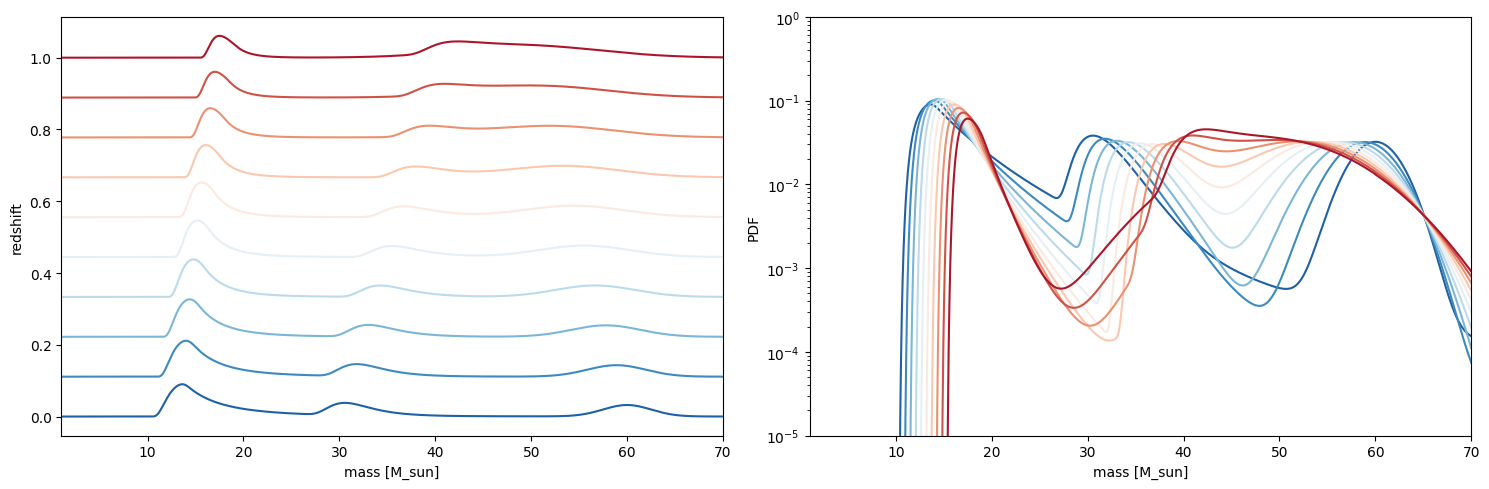

In [10]:
mw = icarogw.wrappers.PowerLawRedshiftLinear_PowerLawRedshiftLinear_GaussianRedshiftLinear(flag_powerlaw_smoothing = 1, redshift_transition = 'linear')
print(mw.population_parameters)

mw.update(
    alpha_a_z0   = 4.,
    mmin_a_z0    = 10.,
    mmax_a_z0    = 150.,
    alpha_a_z1   = 10.,
    mmin_a_z1    = 5.,
    mmax_a_z1    = 0.,
    delta_m_a    = 5.,

    alpha_b_z0   = 20.,
    mmin_b_z0    = 25.,
    mmax_b_z0    = 60.,
    alpha_b_z1   = 0.,
    mmin_b_z1    = 10.,
    mmax_b_z1    = 0.,
    delta_m_b    = 20.,

    mu_z0        = 60.,
    mu_z1        = -10.,
    sigma_z0     = 2.5,
    sigma_z1     = 5.,

    mix_alpha_z0 = 0.6,
    mix_alpha_z1 = 0.2,
    mix_beta_z0  = 0.2,
    mix_beta_z1  = 0.2)

plot_model(mw, redshift_evolution = True)

### Gaussian(z) Gaussian(z)

['mu_a_z0', 'mu_a_z1', 'sigma_a_z0', 'sigma_a_z1', 'mu_b_z0', 'mu_b_z1', 'sigma_b_z0', 'sigma_b_z1', 'mix_z0', 'mmin_g', 'mix_z1']


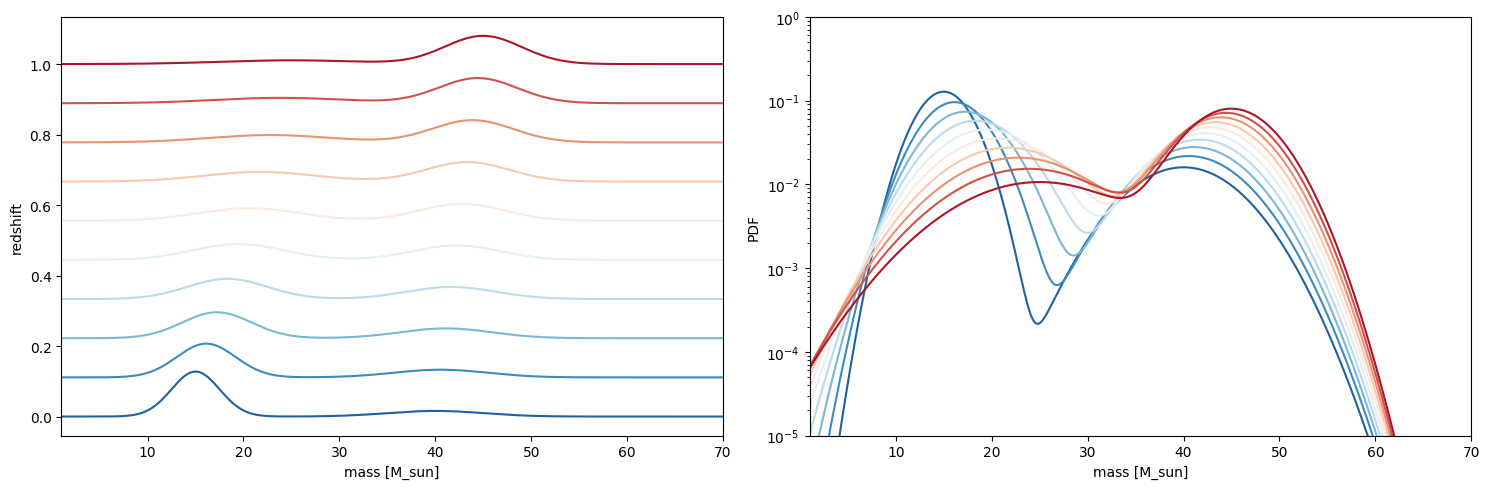

In [11]:
mw = icarogw.wrappers.GaussianRedshiftLinear_GaussianRedshiftLinear(redshift_transition = 'linear')
print(mw.population_parameters)

mw.update(
    mu_a_z0    = 15.,
    mu_a_z1    = 10.,
    sigma_a_z0 = 2.5,
    sigma_a_z1 = 5.,
    mmin_g     = 1.,

    mu_b_z0    = 40.,
    mu_b_z1    = 5.,
    sigma_b_z0 = 5.,
    sigma_b_z1 = -1.,

    mix_z0     = 0.8,
    mix_z1     = 0.2)

plot_model(mw, redshift_evolution = True)

### Gaussian(z) Gaussian(z) Gaussian(z)

['mu_a_z0', 'mu_a_z1', 'sigma_a_z0', 'sigma_a_z1', 'mu_b_z0', 'mu_b_z1', 'sigma_b_z0', 'sigma_b_z1', 'mu_c_z0', 'mu_c_z1', 'sigma_c_z0', 'sigma_c_z1', 'mix_alpha_z0', 'mix_beta_z0', 'mmin_g', 'mix_alpha_z1', 'mix_beta_z1']


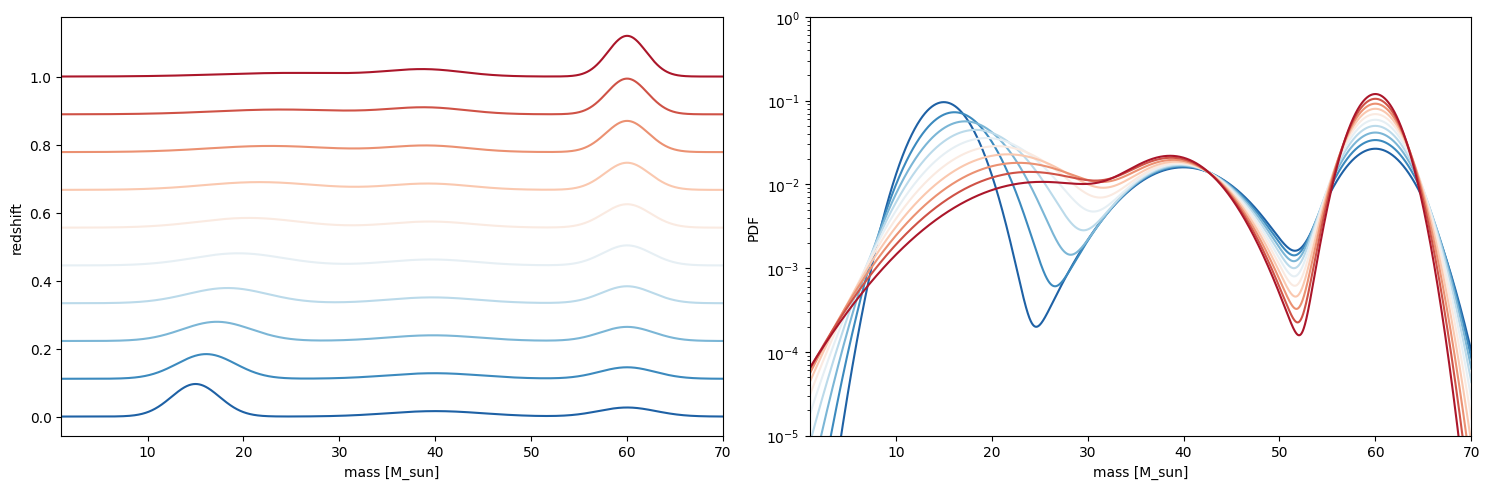

In [12]:
mw = icarogw.wrappers.GaussianRedshiftLinear_GaussianRedshiftLinear_GaussianRedshiftLinear(redshift_transition = 'linear')
print(mw.population_parameters)

mw.update(
    mu_a_z0    = 15.,
    mu_a_z1    = 10.,
    sigma_a_z0 = 2.5,
    sigma_a_z1 = 5.,
    mmin_g     = 1.,

    mu_b_z0    = 40.,
    mu_b_z1    = -1.,
    sigma_b_z0 = 5.,
    sigma_b_z1 = -1.,

    mu_c_z0    = 60.,
    mu_c_z1    = 0.,
    sigma_c_z0 = 3.,
    sigma_c_z1 = -1.,

    mix_alpha_z0 = 0.6,
    mix_alpha_z1 = 0.2,
    mix_beta_z0  = 0.2,
    mix_beta_z1  = 0.2)

plot_model(mw, redshift_evolution = True)

### Gaussian(z) polynomial redshift

['mu_z0', 'mu_z1', 'mu_z2', 'sigma_z0', 'sigma_z1', 'sigma_z2']


/Users/vgennari/anaconda3/envs/icarogw_env/lib/python3.10/site-packages/icarogw/wrappers.py:1428: RuntimeWarning: divide by zero encountered in log
  gaussian = xp.log( sx.stats.truncnorm.pdf(m, a, b, loc = self.muz, scale = self.sigmaz) )


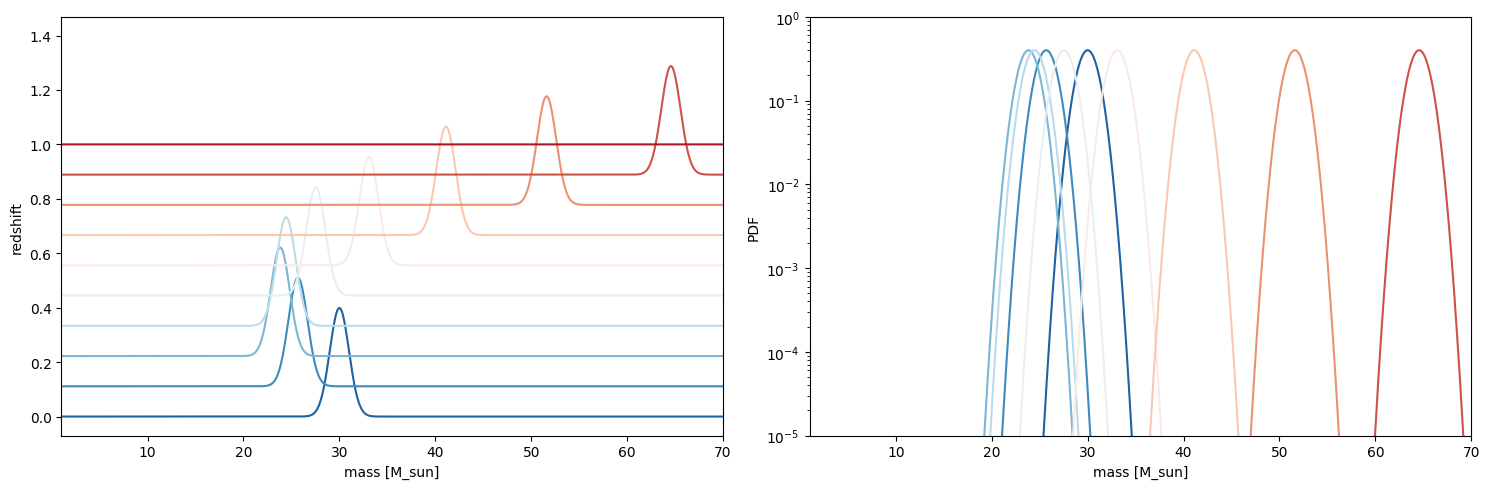

In [13]:
mw = icarogw.wrappers.GaussianEvolving(order = 2)
print(mw.population_parameters)

# Quadratic
mw.update(
    mu_z0    = 30,
    mu_z1    = -50,
    mu_z2    = 100,
    sigma_z0 = 1.,
    sigma_z1 = 0.,
    sigma_z2 = 0.,
)

plot_model(mw, redshift_evolution = True)